Hand Written Digital Prediction-Classification Analysis


-------------

## **Objective**

Handwritten digit recognition is an important application of machine learning, particularly in the field of computer vision. The task involves identifying handwritten digits from an image and classifying them into the corresponding numerical values*

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Import Data**

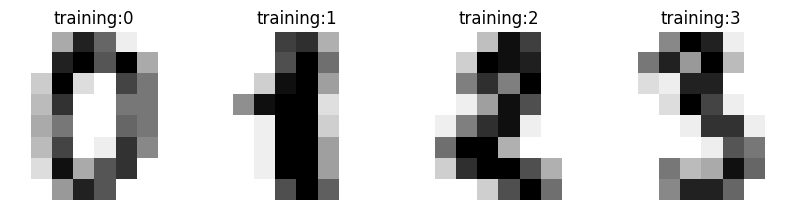

In [3]:
from sklearn.datasets import load_digits
df=load_digits()
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("training:%i"%label)

## **Data Preprocessing**

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)


1797

In [8]:
n_samples=len(df.images)
data=df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

Scaling image data

In [12]:
data.max()

16.0

In [13]:
data=data/16
data.min()

0.0

In [14]:
data.max()

1.0

In [15]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test split Data

In [18]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test =train_test_split(data, df.target, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [20]:
from sklearn.ensemble import RandomForestClassifier


rf=RandomForestClassifier()


rf.fit(x_train,y_train)

RandomForestClassifier()

Predict Test Data

In [22]:
y_pred=rf.predict(x_test)
y_pred

array([1, 9, 0, 5, 7, 4, 2, 2, 6, 3, 8, 8, 5, 4, 0, 5, 8, 2, 7, 8, 6, 8,
       3, 4, 6, 0, 9, 4, 0, 8, 5, 9, 5, 8, 7, 6, 5, 4, 3, 5, 4, 9, 7, 6,
       7, 4, 9, 0, 6, 4, 6, 9, 1, 9, 1, 4, 3, 1, 9, 8, 9, 2, 7, 7, 0, 0,
       0, 4, 4, 5, 7, 2, 9, 6, 6, 5, 9, 4, 8, 1, 8, 1, 4, 0, 0, 2, 7, 2,
       6, 1, 6, 6, 0, 7, 8, 2, 8, 8, 4, 8, 2, 8, 2, 0, 6, 5, 1, 4, 1, 3,
       3, 9, 1, 8, 1, 1, 7, 6, 6, 6, 0, 8, 2, 6, 3, 6, 0, 9, 5, 0, 4, 4,
       3, 0, 4, 1, 8, 7, 0, 7, 0, 1, 2, 8, 5, 9, 2, 1, 5, 5, 7, 4, 3, 3,
       7, 7, 4, 0, 1, 3, 9, 6, 4, 7, 1, 2, 1, 7, 6, 1, 0, 7, 1, 0, 6, 7,
       5, 3, 7, 0, 3, 5, 5, 1, 6, 5, 7, 5, 7, 3, 3, 4, 0, 4, 3, 8, 5, 1,
       0, 9, 0, 2, 6, 7, 7, 1, 3, 4, 1, 1, 6, 6, 0, 9, 7, 4, 5, 2, 0, 7,
       5, 0, 6, 3, 0, 4, 7, 0, 9, 9, 5, 0, 0, 4, 3, 4, 7, 6, 3, 1, 2, 5,
       6, 1, 7, 1, 5, 6, 0, 5, 7, 3, 1, 1, 5, 3, 8, 4, 1, 5, 3, 3, 8, 9,
       1, 8, 0, 6, 4, 1, 4, 1, 6, 3, 9, 7, 7, 5, 1, 7, 1, 1, 5, 4, 8, 1,
       1, 8, 4, 7, 7, 1, 5, 3, 1, 0, 9, 1, 0, 1, 4,

Model Accuracy

In [23]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[51,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 56,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  1, 50,  1,  0,  0,  2],
       [ 0,  0,  0,  0,  1,  1, 61,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 62,  0,  0],
       [ 0,  2,  0,  0,  1,  1,  0,  0, 50,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 41]])

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       0.97      0.98      0.98        65
           2       1.00      0.98      0.99        41
           3       0.96      0.96      0.96        50
           4       0.95      1.00      0.97        56
           5       0.94      0.91      0.93        55
           6       0.98      0.97      0.98        63
           7       1.00      1.00      1.00        62
           8       0.94      0.93      0.93        54
           9       0.95      0.95      0.95        43

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

